# Import CSV and Preprocess Reaction Times

I'll begin by importing data from the CSV file, and then preprocessing some of the data.

In [9]:
import pandas as pd

df = pd.read_csv('Tuning In to Tempo.csv')

# Remove timestamps
df = df.drop(columns='Timestamp')

# Note that some of the values for these times are invalid/unusual for reaction times
#df[['Time #1 (in ms)', 'Time #2 (in ms)','Time #3 (in ms)']]

It's evident that the 21st row has falsified data, so I'll be removing the entire row. The 14th row also has an extremely large reaction time, so I'll be replacing it with the average of the other two values.

In [11]:
# df = df.drop(labels=21, axis=0)
# df.at[14,'Time #1 (in ms)'] = int((df.at[14,'Time #2 (in ms)'] + df.at[14,'Time #3 (in ms)']) / 2)

# df

I can now compute the average reaction times, and organize the data.

In [12]:
# Convert discrete labels to numerical values
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == "Man" else (1 if x == "Woman" else 2))

# Compute the average for the base time
df['Avg Base Time (ms)'] = df[['Time #1 (in ms)', 'Time #2 (in ms)','Time #3 (in ms)']].mean(axis=1).round(0)

for i in range(1, 5):
    # Compute the average for the reaction times for each song
    df[f'Avg Reaction Time #{i} (ms)'] = df[[f'Time #1 (in ms).{i}', f'Time #2 (in ms).{i}',f'Time #3 (in ms).{i}']].mean(axis=1).round(0)
    # Convert the discrete labels for having heard the song before to binary values
    if i == 1: 
        df[f'Heard Before Song #{i}'] = df[f'Have you heard of this song before?'].apply(lambda x: 0 if x == "No" else 1)
    else:
        df[f'Heard Before Song #{i}'] = df[f'Have you heard of this song before?.{i-1}'].apply(lambda x: 0 if x == "No" else 1)

# Remove the old columns
df.drop(df.iloc[:, 4:-9], axis=1, inplace=True)

# df

In [14]:
alternate_df = df.copy(deep=True)

# Add columns for the deviation of the reaction times from the base time
for i in range(1, 5):
    alternate_df[f'Reaction Time Deviation #{i}'] = alternate_df.apply(lambda row: row[f'Avg Reaction Time #{i} (ms)'] - row['Avg Base Time (ms)'], axis=1)
    
alternate_df

,Age,Mood,Energy,Gender,Avg Base Time (ms),Avg Reaction Time #1 (ms),Heard Before Song #1,Avg Reaction Time #2 (ms),Heard Before Song #2,Avg Reaction Time #3 (ms),Heard Before Song #3,Avg Reaction Time #4 (ms),Heard Before Song #4,Reaction Time Deviation #1,Reaction Time Deviation #2,Reaction Time Deviation #3,Reaction Time Deviation #4
0,20,4,4,0,313.0,346.0,1,333.0,0,393.0,0,311.0,0,33.0,20.0,80.0,-2.0
1,20,3,2,1,352.0,354.0,1,391.0,0,381.0,0,356.0,0,2.0,39.0,29.0,4.0
2,19,3,2,0,359.0,280.0,1,303.0,0,262.0,0,326.0,0,-79.0,-56.0,-97.0,-33.0
3,22,3,4,1,296.0,266.0,1,227.0,0,275.0,0,286.0,0,-30.0,-69.0,-21.0,-10.0
4,25,2,2,1,270.0,274.0,1,283.0,0,255.0,0,313.0,0,4.0,13.0,-15.0,43.0
5,23,2,3,1,196.0,265.0,1,212.0,0,234.0,1,264.0,0,69.0,16.0,38.0,68.0
6,23,4,3,0,260.0,268.0,1,247.0,0,242.0,0,249.0,1,8.0,-13.0,-18.0,-11.0
7,20,4,3,1,293.0,284.0,1,294.0,0,305.0,0,268.0,0,-9.0,1.0,12.0,-25.0
8,19,2,1,1,331.0,299.0,1,278.0,0,268.0,0,326.0,1,-32.0,-53.0,-63.0,-5.0
9,18,3,2,1,271.0,269.0,1,272.0,0,261.0,0,274.0,0,-2.0,1.0,-10.0,3.0


# Reaction Times Exploratory Data Analysis

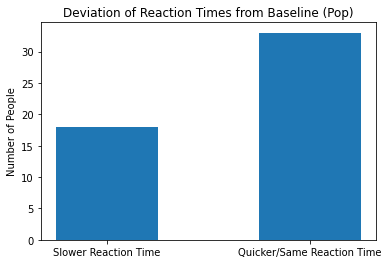

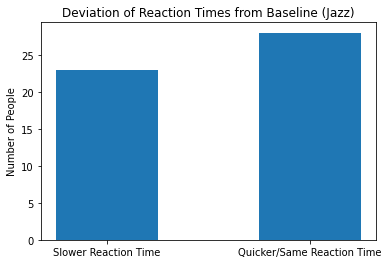

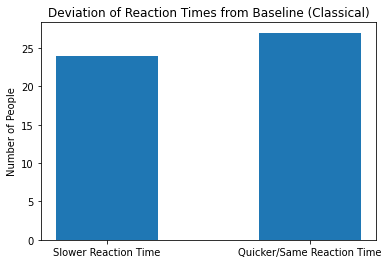

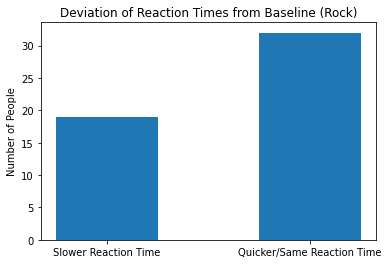

In [23]:
import matplotlib.pyplot as plt

# Pop, Jazz, Classical, Rock (in that order)
num_data = len(alternate_df.index)
num_pop_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #1'] > 0])
num_jazz_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #2'] > 0])
num_classical_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #3'] > 0])
num_rock_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #4'] > 0])

song_genre = ["Pop", "Jazz", "Classical", "Rock"]
slower_reaction = [num_pop_slower_reaction, num_jazz_slower_reaction, num_classical_slower_reaction, num_rock_slower_reaction]
quicker_reaction = [num_data - slower_reaction[i] for i in range(len(slower_reaction))]

for i in range(4):
    plt.bar(['Slower Reaction Time', 'Quicker/Same Reaction Time'], [slower_reaction[i], quicker_reaction[i]], width=0.5)

    plt.title(f'Deviation of Reaction Times from Baseline ({song_genre[i]})')
    plt.ylabel('Number of People')
    plt.show()

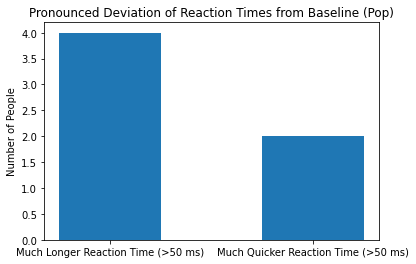

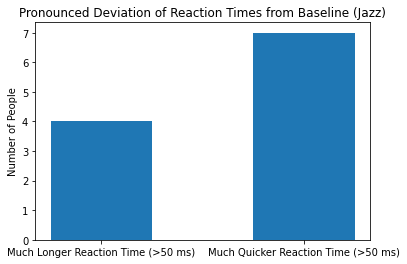

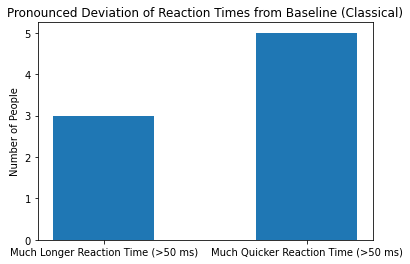

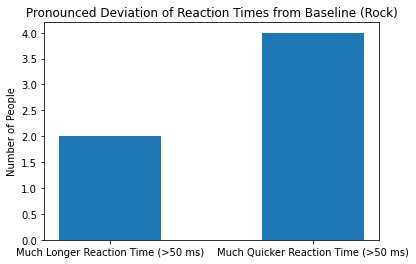

In [28]:
num_pop_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #1'] > 50])
num_jazz_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #2'] > 50])
num_classical_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #3'] > 50])
num_rock_much_slower_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #4'] > 50])

num_pop_much_quicker_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #1'] < -50])
num_jazz_much_quicker_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #2'] < -50])
num_classical_quicker_longer_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #3'] < -50])
num_rock_much_quicker_reaction = len(alternate_df[alternate_df['Reaction Time Deviation #4'] < -50])

much_slower_reaction = [num_pop_much_slower_reaction, num_jazz_much_slower_reaction, num_classical_much_slower_reaction, num_rock_much_slower_reaction]
much_quicker_reaction = [num_pop_much_quicker_reaction, num_jazz_much_quicker_reaction, num_classical_quicker_longer_reaction, num_rock_much_quicker_reaction]

for i in range(4):
    plt.bar(['Much Longer Reaction Time (>50 ms)', 'Much Quicker Reaction Time (>50 ms)'], [much_slower_reaction[i], much_quicker_reaction[i]], width=0.5)

    plt.title(f'Pronounced Deviation of Reaction Times from Baseline ({song_genre[i]})')
    plt.ylabel('Number of People')
    plt.show()

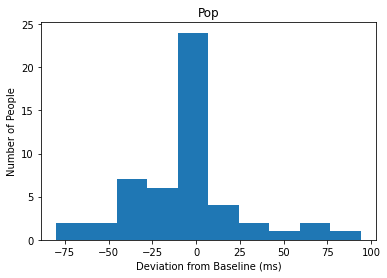

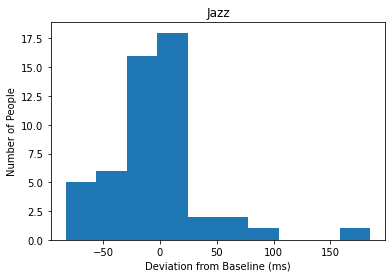

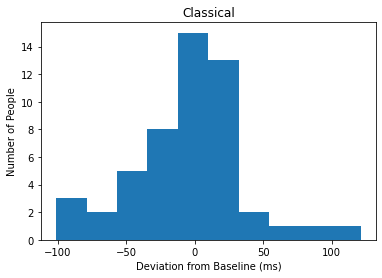

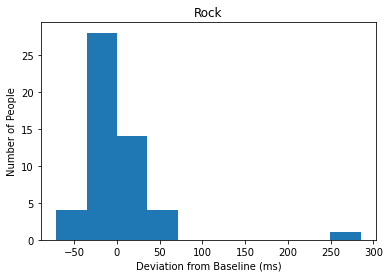

In [40]:
import numpy as np

pop_deviations = alternate_df['Reaction Time Deviation #1'].to_numpy()
jazz_deviations = alternate_df['Reaction Time Deviation #2'].to_numpy()
classical_deviations = alternate_df['Reaction Time Deviation #3'].to_numpy()
rock_deviations = alternate_df['Reaction Time Deviation #4'].to_numpy()

histogram_selections = [pop_deviations, jazz_deviations, classical_deviations, rock_deviations]

for i in range(4):
    plt.hist(histogram_selections[i])
    plt.title(f'{song_genre[i]}')
    plt.xlabel('Deviation from Baseline (ms)')
    plt.ylabel('Number of People')
    plt.show() 